-

## 1. 왜 Explainable AI(XAI)가 중요한가?

* 현대 머신러닝 모델은 성능이 높지만, 내부 예측 과정이 블랙박스라

  * 의료 진단, 금융 대출 등 **결과의 이유를 명확히** 밝혀야 하는 분야에서 제약
* XAI는 “왜 이 결정을 내렸는가?”를

  * **전역(global)** 관점: 모델 전체가 어떤 피처에 의존하는지
  * **국소(local)** 관점: 특정 샘플에 대해 어떤 피처가 기여했는지
    분석합니다.

---

## 2. SHAP (SHapley Additive exPlanations)

### 핵심 개념

1. **게임이론의 샤플리 값**을 차용
2. 각 피처(feature)가 모델 출력에 기여한 정도를 **공정하게 분배**
3. 공식

   $$
     f(x) = \phi_0 + \sum_{i=1}^M \phi_i
   $$

   * $\peature_names=iris.feature_names,
    matplotlib=True
)
```

* **Summary Plot**: 각 피처의 전체 영향도
* **Force Plot**: 한 샘플에 대한 개별 기여도

---

## 3. LIME (Local Interpretable Model-agnostic Explanations)

### 핵심 개념

1. 관심 샘플 주변에 **유사 샘플(pertur* 중요도가 낮은 피처를 제거한 후 모델 재학습 → 성능·설명 변화 관찰

---

이상으로 **Day 25: SHAP & LIME** 수업을 마칩니다.
궁금한 점 있거나, 코드 실행 중 에러가 나면 알려주세요!


# SHAP (SHapley Additive exPlanations)

In [12]:
pip install shap


   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
import shap

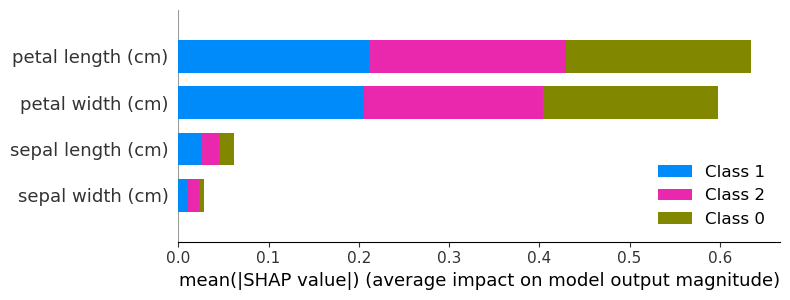

In [59]:
iris=load_iris()

x_train,x_test,y_train,y_test=tts(iris.data,iris.target,test_size=0.3, random_state=42)

model=RFC().fit(x_train,y_train)

explainer=shap.Explainer(model.predict_proba,
                            x_train, 
                            feature_names=iris.feature_names
                            )
shap_value=explainer(x_train)

shap.summary_plot(shap_value,x_test)




In [65]:
i = 0
class_idx= y_test[i]

# 1) base value (스칼라)
base_val = shap_value.base_values[i][cls]

# 2) 1D 벡터였던 shap & feature를 2D 배열로 reshape
shap_vec = shap_value.values[i][:, cls]   
feat=x_test[i]

print("base_val:", base_val)
print("shap_vec.shape:", shap_vec.shape)  # (4,)
print("feat.shape    :", feat.shape)      # (4,)


# 4) Force plot
shap.initjs()
shap.plots.force(
    base_val,      # 1) base value
    shap_vec,      # 2) shap values for that class
    feat,          # 3) feature values
    feature_names=iris.feature_names
)


base_val: 0.33469999999999994
shap_vec.shape: (4,)
feat.shape    : (4,)


In [55]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 1) 데이터 & 모델
iris       = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# 2) 통합 Explainer 생성 (probability 기준)
explainer    = shap.Explainer(model.predict_proba, X_train, feature_names=iris.feature_names)
shap_values  = explainer(X_test)   # Explanation 객체

# shap_values.values.shape == (n_samples, n_features, n_classes)
# shap_values.base_values.shape == (n_samples, n_classes)

# 3) 첫 샘플에 대해 “실제 레이블 클래스”의 SHAP force plot
i = 0
class_idx = y_test[i]  

# a) 이 샘플의 base value (스칼라)
base_val = shap_values.base_values[i][class_idx]

# b) 이 샘플의 SHAP 값 벡터 (피처별, shape: (n_features,))
shap_vec = shap_values.values[i][:, class_idx]

# c) 이 샘플의 피처 벡터 (shape: (n_features,))
feat = X_test[i]

print("base_val:", base_val)
print("shap_vec.shape:", shap_vec.shape)  # (4,)
print("feat.shape    :", feat.shape)      # (4,)

# 4) Force plot
shap.initjs()
shap.plots.force(
    base_val,      # 1) base value
    shap_vec,      # 2) shap values for that class
    feat,          # 3) feature values
    feature_names=iris.feature_names
)


base_val: 0.33779999999999993
shap_vec.shape: (4,)
feat.shape    : (4,)


# LIME (Local Interpretable Model-agnostic Explanations)

In [123]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

In [127]:
explainer_lime=LimeTabularExplainer(
    x_train,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    discretize_continuous=True,
    random_state=42
)

In [129]:
exp=explainer_lime.explain_instance(
    x_test[0],
    model.predict_proba,
    num_features=4
)

In [131]:
exp.show_in_notebook(show_table=True)
print(exp.as_list())

[('0.40 < petal width (cm) <= 1.30', 0.27884491298162895), ('4.30 < petal length (cm) <= 5.10', 0.1968261116197978), ('sepal width (cm) <= 2.80', -0.019873461983555416), ('5.80 < sepal length (cm) <= 6.40', -0.0019569444827039133)]


In [120]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# LIME Explainer 설정
explainer_lime = LimeTabularExplainer(
    X_train,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    discretize_continuous=True,
    random_state=42
)

# 첫 샘플 설명
exp = explainer_lime.explain_instance(
    X_test[0],
    model.predict_proba,
    num_features=4
)
# 노트북에 시각화
exp.show_in_notebook(show_table=True)
# 또는 텍스트로 확인
print(exp.as_list())


[('0.40 < petal width (cm) <= 1.30', 0.27884491298162895), ('4.30 < petal length (cm) <= 5.10', 0.1968261116197978), ('sepal width (cm) <= 2.80', -0.019873461983555416), ('5.80 < sepal length (cm) <= 6.40', -0.0019569444827039133)]


아래에 오늘 다룬 **Explainable AI**(XAI) 기법, 특히 **SHAP**와 **LIME**을 좀 더 깊이 있게 정리해 보았습니다.

---

## 1. XAI(Explainable AI) 개요

* **목적**: 블랙박스 모델(랜덤포레스트·딥러닝 등)의 “왜 이런 예측을 내렸는지” 설명
* **관점**

  * **Global**: 모델 전체가 어떤 피처에 의존하는지
  * **Local**: 특정 샘플에 대해 어떤 피처가 기여했는지
* **분류**

  * 모델-애그노스틱(Model-agnostic)
  * 모델-스페시픽(Model-specific)

---

## 2. LIME (Local Interpretable Model-agnostic Explanations)

### 2.1 핵심 아이디어

1. **관심 샘플** $x$ 주위에 작은 변형(perturbations) $z$ 생성
2. 각 $z$에 원본 모델 $f$로 예측값 $f(z)$ 계산
3. $z$와 $x$ 사이의 “유사도” $π_x(z)$ 정의 (예: RBF 커널)
4. **국소적 선형 모델** $g(z) = w^T z + b$ 을 학습

   * **목표 손실**:

     $$
       \min_{w,b}\ 
       \sum_{z} π_x(z)\,\bigl(f(z) - g(z)\bigr)^2
       \;+\; \Omega(g)
     $$
   * $\Omega(g)$: 복잡도(모델 단순화) 제약
5. $g$의 계수 $w_i$가 피처 기여도로 해석

### 2.2 알고리즘 요약

```text
Input: 원본 모델 f, 관심 샘플 x, 생성 개수 N 
1. {z_j} ← x 주변에서 N개의 perturbed 샘플 생성
2. for each z_j:
      y_j ← f(z_j)                      # 원본 예측
      w_j ← π_x(z_j)                    # 유사도 가중치
3. Fit weighted linear model g: minimize ∑_j w_j (y_j - g(z_j))^2 + Ω(g)
4. Return feature weights w_i from g
```

### 2.3 장·단점

* 장점: 모델 구조 상관없이 적용 가능, 결과가 직관적
* 단점: perturbed 샘플 수·가중치 커널 설정에 민감, 국소 영역 밖 일반화 불가

---

## 3. SHAP (SHapley Additive exPlanations)

### 3.1 핵심 아이디어

* **게임이론 샤플리 값**을 차용하여,
* 각 피처가 예측값에 기여한 양을 **공정하게** 분배

### 3.2 수식

$$
  f(x) = \phi_0 + \sum_{i=1}^M \phi_i
$$

* $\phi_0$: **기준값**(모든 피처를 “없앤” 상태에서 기대 예측)
* $\phi_i$: i번째 피처의 **Shapley value**
* 계산:

  $$
    \phi_i = \sum_{S \subseteq F \setminus \{i\}}
      \frac{|S|!\,(M - |S| - 1)!}{M!}\,
      \Bigl[f_{S\cup\{i\}}(x) - f_S(x)\Bigr]
  $$

  * $S$: 피처 i를 제외한 모든 부분집합
  * $f_S(x)$: S 피처만 사용했을 때 예측(나머지는 평균값 등으로 대체)

### 3.3 근사 기법

* 전체 부분집합($2^M$)을 다 쓸 수 없으므로 **샘플링**(KernelSHAP)
* **TreeSHAP**: 트리 모델 전용의 다항식 시간 알고리즘

### 3.4 장·단점

* 장점: 이론적 공정성 보장, global/local 모두 해석 가능
* 단점: 피처 수가 많으면 계산비용, 근사 오차


---

## 5. 오늘 배운 내용 정리

1. **XAI의 필요성**: 블랙박스 모델의 투명성 확보
2. **LIME**: 국소적 perturbed 샘플 → 선형 모델 근사
3. **SHAP**: 게임이론 샤플리 값 → 피처별 기여도 분배
4. **장·단점 비교**를 통해 실제 사용 시 고려할 점 학습





## 1. 적용 대상 모델 예시

* **회귀 모델**: 랜덤포레스트 회귀, XGBoost 회귀, 선형 회귀, SVR 등
* **분류 모델**: 상승/하락 분류(랜덤포레스트 분류, 로지스틱 회귀 등)
* **딥러닝 모델**: LSTM·Transformer 기반 시계열 예측 모델

---

## 2. 피처 구성 예시

주식 예측 모델에서 흔히 쓰는 피처들:

* 과거 종가(종가(t–1), 종가(t–2), …)
* 거래량, 변동성 지표(ATR, Bollinger Bands)
* 기술지표(MACD, RSI, 이동평균선 차이)
* 펀더멘털 데이터(실적, 재무비율)

이런 피처들을 데이터프레임으로 정리한 뒤,

```python
X = df[["close_t-1","close_t-2", …, "RSI", "MACD"]]
y = df["close_t"]  # 회귀
# 또는 y = (df["close_t"] > df["open_t"]).astype(int)  # 상승/하락 분류
```

처럼 준비합니다.

---

## 3. SHAP으로 설명하기

```python
import shap
from sklearn.ensemble import RandomForestRegressor  # 회귀 예시

# 1) 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# 2) SHAP Explainer (확률보단 예측값 기준이니 model.predict)
explainer = shap.Explainer(model.predict, X_train, feature_names=X.columns)
shap_values = explainer(X_test)  # Explanation 객체

# 3) 전역 중요도 (어떤 피처가 전체 예측에 영향 컸는지)
shap.summary_plot(shap_values, X_test)

# 4) 국소 설명 (특정 날짜의 예측값을 왜 그렇게 냈는지)
idx = 0  # 예시: X_test 첫 번째 샘플
shap.initjs()
shap.plots.force(shap_values[idx])  
```

* **summary\_plot**: 피처별 분포와 기여도
* **force** 또는 **waterfall plot**: 한 샘플 설명

---

## 4. LIME으로 설명하기

```python
from lime.lime_tabular import LimeTabularExplainer

explainer_lime = LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    mode="regression"  # 회귀 모드
)
exp = explainer_lime.explain_instance(
    X_test.values[0],
    model.predict,      # 회귀라 predict
    num_features=6
)
print("LIME 설명:", exp.as_list())
exp.as_pyplot_figure()
```

* `mode="classification"` 으로 설정하면 분류용
* `num_features` 만큼 중요한 피처와 기여도를 리턴

---

## 5. 주의사항 & 팁

* **시계열 데이터 특성**: XAI는 독립 IID 샘플 가정에 기반하므로, 시계열 모델에 적용할 때는

  * 입력 피처를 “과거 시점 피처”로 명시적으로 만들거나,
  * LIME의 perturbed 샘플 생성 시 시계열 구조를 고려해야 합니다.
* **피처 상관관계**: 기술지표나 시계열 피처끼리 상관관계가 높으면, SHAP 값 해석 시 주의가 필요합니다.
* **성능 vs. 설명**: 모델이 복잡할수록 설명이 더 중요해지지만, 해석 기법의 근사 오차도 늘어날 수 있습니다.

---

### 결론

> 네, 주식 예측 모델도 XAI의 \*\*구조(Explainer 생성 → SHAP/LIME 계산 → summary/force plot)\*\*를 그대로 따라 하면,
> “이 날짜 예측이 오르락내리락한 이유”를 **피처별 기여도**로 분석하고 시각화할 수 있습니다.


# 모델 해석 심화 – Grad-CAM & Attention Map

In [78]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader as loader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [80]:
device=torch.device('cuda'if torch.cuda.is_available()else'cpu')
print(device)
model=torchvision.models.resnet18(pretrained=True).to(device).eval()

cuda


In [82]:
activation,gradiant={},{}
def forward_hook(m,inp,out):activation['val']=out.detach()
def backward_hook(m,gin,gout):gradiant['val']=gout[0].detach()

target_layer=model.layer4[1].conv2
target_layer.register_forward_hook(forward_hook)
target_layer.register_backward_hook(backward_hook)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [83]:
# 3) 이미지 읽기·전처리

img=cv2.imread("C:/Users/JH/Pictures/00762-717547931.png")[:,:,::-1]

orig_h,orig_w=img.shape[:2]
pred=transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225]) 
])

inp=pred(img).unsqueeze(0).to(device)
print(inp.shape)  # (1, 3, 224, 224)이 나와야 정상입니다.


torch.Size([1, 3, 224, 224])


In [84]:
# 4) 순전파·역전파

out=model(inp)
pred=out.argmax(1).item()
model.zero_grad()
out[0,pred].backward()


In [94]:
act=activation['val'][0]
grad=gradiant['val'][0]
weight=grad.mean(dim=(1,2))
cam=torch.zeros(act.shape[1:],device=device)
for k,w in enumerate(weight):cam+=w*act[k]

cam=F.relu(cam).cpu().numpy()
cam=cv2.resize(cam,(orig_h,orig_w))
cam=(cam-cam.min())/(cam.max()-cam.min())


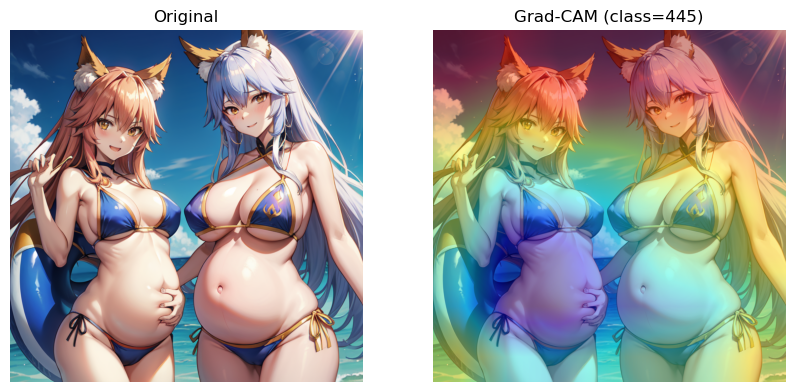

In [96]:
# 6) 시각화
heat = cv2.applyColorMap((cam*255).astype(np.uint8), cv2.COLORMAP_JET)
overlay = heat*0.4 + img*0.6
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(overlay.astype(np.uint8))
plt.title(f'Grad-CAM (class={pred})'); plt.axis('off')
plt.show()

In [158]:
heatmap = cv2.applyColorMap(
    (cam * 255).astype(np.uint8),
    cv2.COLORMAP_JET        # ← 여기서 컬러맵을 선택
)
alpha = 0.5
overlay = heatmap * alpha + orig_h,orig_w * (1 - alpha)


# Attention Map (Transformer 해석)

In [121]:
from transformers import BertModel,BertTokenizer
import torch
import matplotlib.pyplot as plt

In [123]:
device=torch.device('cuda'if torch.cuda.is_available()else'cpu')
tokenize=BertTokenizer.from_pretrained('bert-base-uncased')
model=BertModel.from_pretrained(
    'bert-base-uncased',output_attentions=True
).to(device).eval()




In [124]:
text = "Explainable AI reveals model decisions."
inputss=tokenize(text,return_tensors='pt').to(device)
out=model(**inputss)
attns=out.attentions[-1][0]

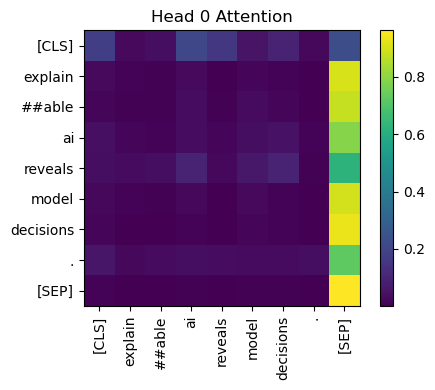

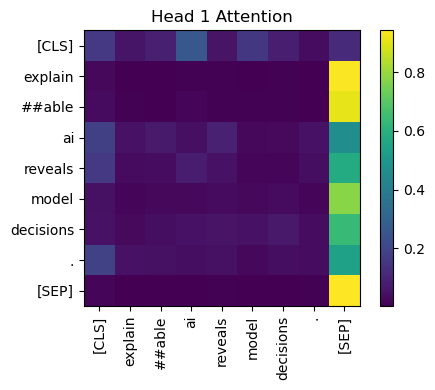

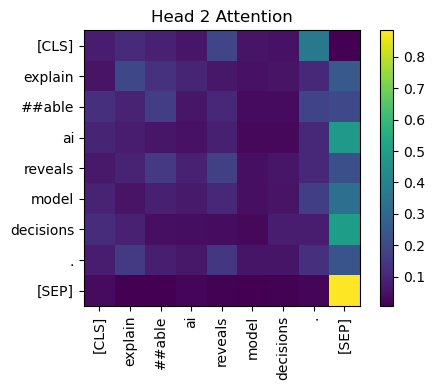

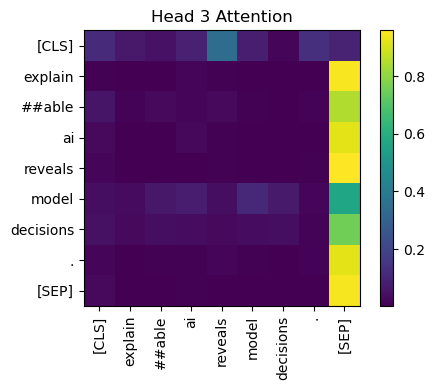

"\ncmap 쪽에서 변경가능(색변환옵션)\n'viridis', 'plasma', 'inferno', 'magma', 'cividis'\n\n'Greys', 'Blues', 'Reds', 'coolwarm' 등\n"

In [152]:
token_ids = inputss['input_ids'][0].tolist()
tokenss=tokenize.convert_ids_to_tokens(input['input_ids'][0])
for head in range(min(4,attns.size(0))):
    plt.figure(figsize=(5,4))
    data=attns[head].detach().cpu().numpy()
    plt.imshow(data, cmap='viridis')
    plt.xticks(range(len(tokenss)), tokenss, rotation=90)
    plt.yticks(range(len(tokenss)), tokenss)
    plt.title(f'Head {head} Attention')
    plt.colorbar(); plt.tight_layout()
    plt.show()


'''
cmap 쪽에서 변경가능(색변환옵션)
'viridis', 'plasma', 'inferno', 'magma', 'cividis'

'Greys', 'Blues', 'Reds', 'coolwarm' 등
'''

-

## 1. Grad-CAM (CNN 시각적 설명)

* **목적**: 이미지 분류 모델(예: ResNet18)이 “어느 영역”을 보고 특정 클래스로 예측했는지 히트맵으로 확인
* **핵심 아이디어**:

  1. 마지막 합성곱 층(feature map)에서 순전파 시 저장된 activation과,
  2. 관심 클래스 출력에 대한 역전파로 계산된 gradient를
  3. 채널별로 공간 평균(weight) → 가중합 → ReLU → 원본 이미지 크기로 리사이즈
* **실습 코드**:

  * `register_forward_hook` / `register_backward_hook` 로 activation, gradient 저장
  * `model(inp)` → `score.backward()` → `activation['val']`·`gradient['val']`로 CAM 계산
  * OpenCV와 Matplotlib로 히트맵 오버레이

---

## 2. Attention Map (Transformer 해석)

* **목적**: BERT/GPT 같은 트랜스포머가 문장 내 토큰 간 주목(attention) 관계를 어떻게 분배했는지 시각화
* **핵심 아이디어**:

  1. `output_attentions=True` 로 모델 출력에 `attentions` 행렬 얻기
  2. `attentions[layer_idx][batch_idx]` → `(num_heads, seq_len, seq_len)`
  3. 각 head별 행렬을 `plt.imshow` 로 히트맵 그리기
* **실습 코드**:

  * Hugging Face `BertModel.from_pretrained(..., output_attentions=True)`
  * `tokenizer.convert_ids_to_tokens` 로 토큰 레이블
  * `detach().cpu().numpy()` 로 넘파이 변환 후 Matplotlib으로 그리기

---

### 오늘 배운 핵심 포인트

1. **Grad-CAM**

   * CNN 내부 feature map과 gradient를 활용해 공간적 중요도를 시각화
2. **Attention Map**

   * 트랜스포머의 multi-head attention 행렬을 통해 문맥 상의 토큰 상호작용을 시각화
3. **핵심 실습**

   * 모델에서 훅(hook) 걸기, `detach()`로 그래디언트 분리하기
   * OpenCV/Matplotlib을 이용한 시각화

이렇게 하지”를 직관적으로 이해할 수 있게 됩니다.
오늘 수업 내용 기억하시고, 복습해 보세요!
